The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


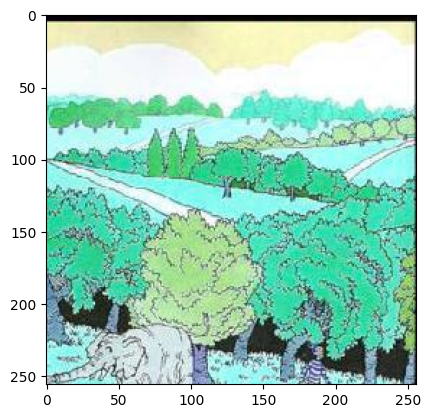

torch.Size([3, 256, 256]) tensor(0.) tensor(255.) torch.float32
torch.Size([256, 256]) (8, 8)
torch.Size([3, 256, 256]) torch.Size([256, 256])
<class 'torch.Tensor'> <class 'torch.Tensor'>
0 255 uint8
torch.Size([256, 256]) (8, 8)
torch.Size([3, 256, 256]) torch.Size([256, 256])
<class 'torch.Tensor'> <class 'torch.Tensor'>
0 255 uint8
torch.Size([256, 256]) (8, 8)
torch.Size([3, 256, 256]) torch.Size([256, 256])
<class 'torch.Tensor'> <class 'torch.Tensor'>
0 255 uint8
torch.Size([256, 256]) (8, 8)
torch.Size([3, 256, 256]) torch.Size([256, 256])
<class 'torch.Tensor'> <class 'torch.Tensor'>
0 255 uint8
torch.Size([256, 256]) (8, 8)
torch.Size([3, 256, 256]) torch.Size([256, 256])
<class 'torch.Tensor'> <class 'torch.Tensor'>
0 255 uint8
torch.Size([256, 256]) (8, 8)
torch.Size([3, 256, 256]) torch.Size([256, 256])
<class 'torch.Tensor'> <class 'torch.Tensor'>
0 255 uint8


In [ ]:
# List all the images in the folder Waldo
# For each image apply some transformation and save it in another folder
%load_ext autoreload

%autoreload 2

import os
import cv2
import numpy as np
from data import BlurImagePerlinNoise
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm

# List all the images in the folder Waldo
path = 'data/Waldo/'
output = "data/WaldoNoise/"
files = os.listdir(path)
images = [f for f in files if f.endswith('.jpg')]

# For each image apply some transformation and save it in another folder
for f in tqdm(images):
    img = cv2.imread(path + f)
    plt.imshow(img)
    plt.show()

    img = torch.Tensor(img).permute(2, 0, 1)
    print(img.shape, img.min(), img.max(), img.dtype)
    for threshold in [0.2,0.3, 0.4, 0.5,0.6,0.7]:
        blurred = BlurImagePerlinNoise(threshold=threshold)(img).numpy()
        blurred = blurred.astype(np.uint8)
        print(blurred.min(), blurred.max(), blurred.dtype)
        # plt.imshow(blurred.transpose(1, 2, 0))
        # plt.colorbar()
        # plt.show()
        # Save blurred img
        cv2.imwrite(f'data/WaldoNoise/{f[:-4]}_{threshold}.jpg', blurred.transpose(1, 2, 0))